# **1. Data Preperation and Cleaning**

In [ ]:
import kagglehub
import pandas as pd
import os

# Download latest version
path = kagglehub.dataset_download("cityofLA/los-angeles-metro-bike-share-trip-data")

print("Path to dataset files:", path)

# List files in the dataset directory
files = os.listdir(path)
print("Files in dataset:", files)

# Load the main trip data CSV (assuming it's named something like 'Metro_Bike_Share_Trips.csv')
for file in files:
    if file.endswith(".csv"):
        dataset_path = os.path.join(path, file)
        df = pd.read_csv(dataset_path)
        break

Path to dataset files: /kaggle/input/los-angeles-metro-bike-share-trip-data
Files in dataset: ['socrata_metadata.json', 'metro-bike-share-trip-data.csv']


In [ ]:
df = df.dropna(thresh=int(0.1 * len(df)), axis=1)

In [ ]:
df['Start Time'] = pd.to_datetime(df['Start Time'])
df['End Time'] = pd.to_datetime(df['End Time'])
df['Trip Duration (min)'] = df['Duration'] / 60  # Optional helper column

In [ ]:
df = df[(df['Duration'] > 60) & (df['Duration'] < 10000)]

In [ ]:
df = df.dropna(subset=['Starting Station ID', 'Ending Station ID'])

In [ ]:
df['Passholder Type'] = df['Passholder Type'].astype('category')
df['Trip Route Category'] = df['Trip Route Category'].astype('category')

In [ ]:
df.head(5)

,Trip ID,Duration,Start Time,End Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude,...,Passholder Type,Starting Lat-Long,Ending Lat-Long,Neighborhood Councils (Certified),Council Districts,Zip Codes,LA Specific Plans,Precinct Boundaries,Census Tracts,Trip Duration (min)
9,18481915,600,2017-01-23 18:48:00,2017-01-23 18:58:00,3082.0,34.046520,-118.237411,3000.0,NaN,NaN,...,Monthly Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
11,19403230,480,2017-02-05 09:43:00,2017-02-05 09:51:00,3064.0,34.046810,-118.256981,3000.0,NaN,NaN,...,Monthly Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
13,18732968,480,2017-01-27 19:55:00,2017-01-27 20:03:00,3063.0,34.049198,-118.252831,3000.0,NaN,NaN,...,Monthly Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
15,20298819,780,2017-02-18 12:39:00,2017-02-18 12:52:00,3014.0,34.056610,-118.237213,3000.0,NaN,NaN,...,Flex Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0
17,21369192,1380,2017-03-05 18:35:00,2017-03-05 18:58:00,3078.0,34.064281,-118.238937,3000.0,NaN,NaN,...,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0


# **2. Data Visualization**

## **2.1 Visualization 1**

<ipython-input-11-bc5fa99af751>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=hour_counts.index, y=hour_counts.values, palette=shades)


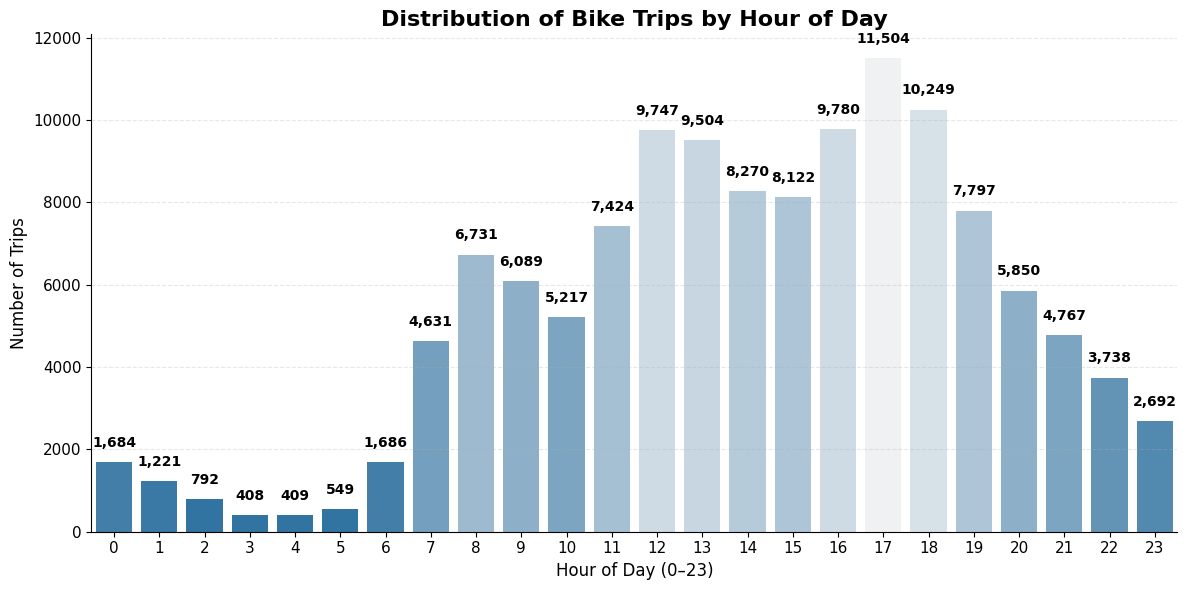

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert to datetime and extract hour
df['Start Time'] = pd.to_datetime(df['Start Time'], errors='coerce')
df['Start Hour'] = df['Start Time'].dt.hour

# Count trips per hour
hour_counts = df['Start Hour'].value_counts().sort_index()

# Normalize trip counts to 0–1 range for color mapping
norm = (hour_counts - hour_counts.min()) / (hour_counts.max() - hour_counts.min())

# Generate varying shades of blue based on normalized counts
colors = sns.light_palette("#1f77b4", n_colors=24)[::-1]  # Reverse if you want darker = higher
shades = [colors[int(val * (len(colors) - 1))] for val in norm]

# Plot
plt.figure(figsize=(12, 6))
bars = sns.barplot(x=hour_counts.index, y=hour_counts.values, palette=shades)

# Annotate bars
for i, value in enumerate(hour_counts.values):
    bars.text(i, value + 300, f"{value:,}", ha='center', va='bottom', fontsize=10, fontweight='bold')

# Titles and labels
plt.title('Distribution of Bike Trips by Hour of Day', fontsize=16, fontweight='bold')
plt.xlabel('Hour of Day (0–23)', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()


## **2.2 Visualization 2**

In [ ]:
# Create summary DataFrame for plotting
passholder_counts = df['Passholder Type'].value_counts().reset_index()
passholder_counts.columns = ['Passholder_Type', 'Trip_Count']  # Renamed for clarity

<ipython-input-13-95933f7004c5>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(
<ipython-input-13-95933f7004c5>:14: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  barplot = sns.barplot(
<ipython-input-13-95933f7004c5>:41: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


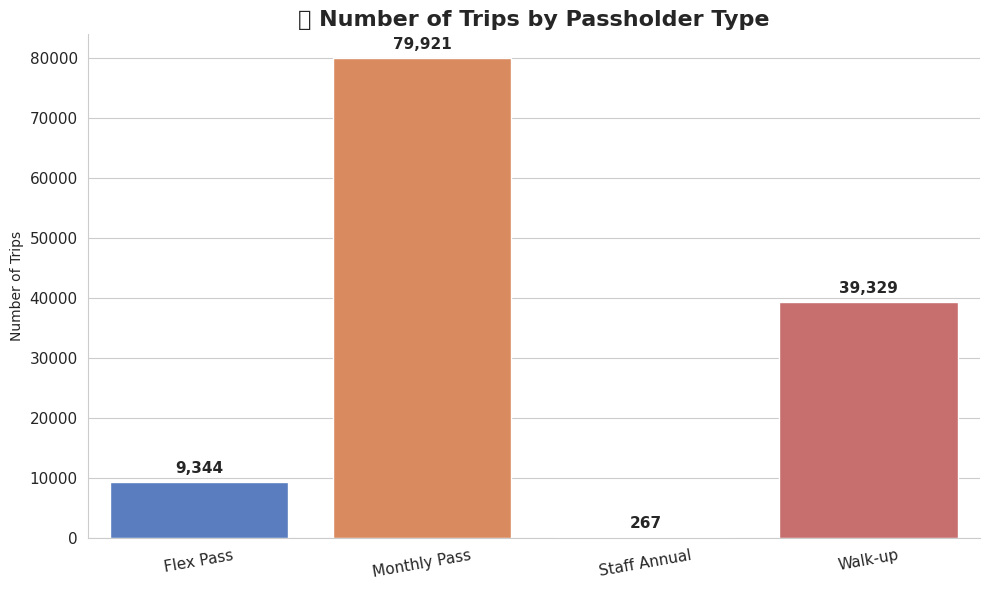

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Clean style
sns.set_style("whitegrid")

# Sort
passholder_counts = passholder_counts.sort_values(by='Trip_Count', ascending=False).reset_index(drop=True)

# Plot
plt.figure(figsize=(10, 6))
colors = sns.color_palette('muted')

barplot = sns.barplot(
    data=passholder_counts,
    x='Passholder_Type',
    y='Trip_Count',
    palette=colors
)

# Annotate bars
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(
        f'{int(height):,}',
        (p.get_x() + p.get_width() / 2, height + 1000),
        ha='center',
        va='bottom',
        fontsize=11,
        fontweight='bold'
    )

# Labels
plt.title('📊 Number of Trips by Passholder Type', fontsize=16, fontweight='bold')
plt.xlabel('')
plt.ylabel('Number of Trips')
plt.xticks(rotation=10, fontsize=11)
plt.yticks(fontsize=11)

sns.despine()
plt.tight_layout()
plt.show()


## **2.3 Visualization 3**

<ipython-input-14-98eefffdd013>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dow_passholder = df.groupby(['Day of Week', 'Passholder Type']).size().unstack().reindex(


<Figure size 1400x800 with 0 Axes>

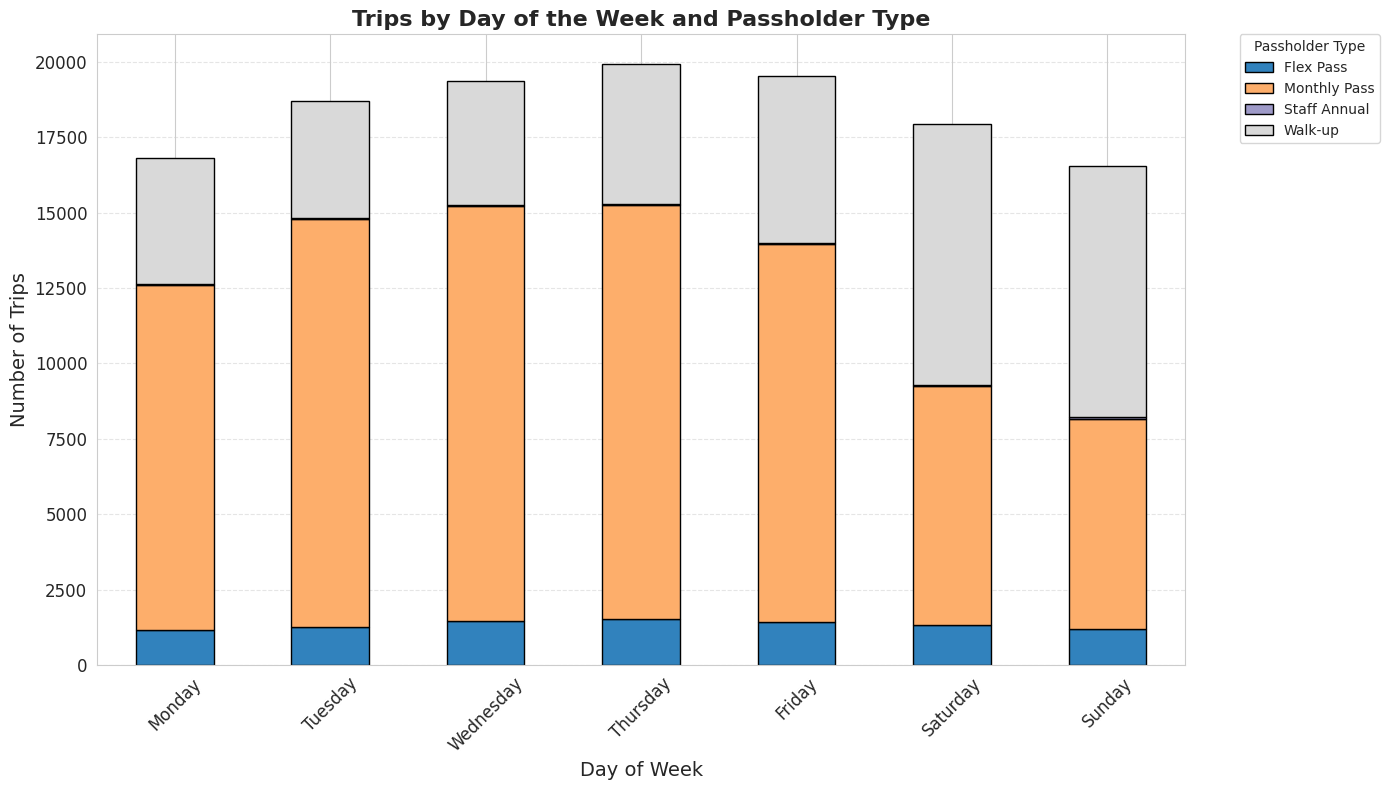

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Start Time' to datetime and extract day of week
df['Start Time'] = pd.to_datetime(df['Start Time'], errors='coerce')
df['Day of Week'] = df['Start Time'].dt.day_name()

# Group by Day of Week and Passholder Type
dow_passholder = df.groupby(['Day of Week', 'Passholder Type']).size().unstack().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# Create figure and plot
plt.figure(figsize=(14, 8))
ax = dow_passholder.plot(
    kind='bar',
    stacked=True,
    colormap='tab20c',
    edgecolor='black',
    figsize=(14, 8)
)

# Customize title and labels
plt.title('Trips by Day of the Week and Passholder Type', fontsize=16, fontweight='bold')
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Number of Trips', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Move legend outside the plot
plt.legend(
    title='Passholder Type',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0.
)

# Grid and layout
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
import kagglehub
import pandas as pd
import os

path = kagglehub.dataset_download("cityofLA/los-angeles-metro-bike-share-trip-data")
print("Path to dataset files:", path)

files = os.listdir(path)
print("Files in dataset:", files)

for file in files:
    if file.endswith(".csv"):
        dataset_path = os.path.join(path, file)
        df = pd.read_csv(dataset_path)
        print(f"Loaded file: {file}")
        break

df['Duration_minutes'] = df['Duration'] / 60  # convert from seconds to minutes

desc_stats = {
    'Mean': df['Duration_minutes'].mean(),
    'Standard Deviation': df['Duration_minutes'].std(),
    '25th Percentile (Q1)': df['Duration_minutes'].quantile(0.25),
    'Median (Q2)': df['Duration_minutes'].median(),
    '75th Percentile (Q3)': df['Duration_minutes'].quantile(0.75)
}

desc_table = pd.DataFrame.from_dict(desc_stats, orient='index', columns=['Trip Duration (min)']).round(2)
print("\nDescriptive Statistics Table:")
print(desc_table)

if 'Passholder Type' in df.columns:
    passholder_counts = df['Passholder Type'].value_counts()
    print("\nTrips by Passholder Type:")
    print(passholder_counts)
else:
    print("\n'Passholder Type' column not found.")


Path to dataset files: /kaggle/input/los-angeles-metro-bike-share-trip-data
Files in dataset: ['socrata_metadata.json', 'metro-bike-share-trip-data.csv']
Loaded file: metro-bike-share-trip-data.csv

Descriptive Statistics Table:
                      Trip Duration (min)
Mean                                25.94
Standard Deviation                  97.03
25th Percentile (Q1)                 6.00
Median (Q2)                         10.00
75th Percentile (Q3)                18.00

Trips by Passholder Type:
Passholder Type
Monthly Pass    81300
Walk-up         41232
Flex Pass        9513
Staff Annual      382
Name: count, dtype: int64


# **3. Data Modeling**

## **3.1 DATA MODEL 1**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, classification_report, confusion_matrix,
    roc_auc_score
)
import joblib
from sklearn.preprocessing import LabelEncoder

In [ ]:
print(df.columns.tolist())


['Trip ID', 'Duration', 'Start Time', 'End Time', 'Starting Station ID', 'Starting Station Latitude', 'Starting Station Longitude', 'Ending Station ID', 'Ending Station Latitude', 'Ending Station Longitude', 'Bike ID', 'Plan Duration', 'Trip Route Category', 'Passholder Type', 'Starting Lat-Long', 'Ending Lat-Long', 'Neighborhood Councils (Certified)', 'Council Districts', 'Zip Codes', 'LA Specific Plans', 'Precinct Boundaries', 'Census Tracts', 'Duration_minutes']


In [ ]:
# Create 'Start Hour' from 'Start Time'
df['Start Hour'] = pd.to_datetime(df['Start Time']).dt.hour

# Filter relevant columns and drop rows with missing data
df_model = df[['Duration_minutes', 'Start Hour', 'Trip Route Category', 'Passholder Type']].dropna()

# Filter to just the two classes
df_model = df_model[df_model['Passholder Type'].isin(['Walk-up', 'Monthly Pass'])]

# Encode categorical column
le = LabelEncoder()
df_model['Trip Route Category'] = le.fit_transform(df_model['Trip Route Category'])

# Define features and target
X = df_model[['Duration_minutes', 'Start Hour', 'Trip Route Category']]
y = df_model['Passholder Type']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
# Preprocessing: one-hot encode Trip Route Category
categorical = ['Trip Route Category']
numeric = ['Trip Duration (min)', 'Start Hour']

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first'), categorical)
], remainder='passthrough')

# Logistic Regression model with class balancing
log_reg_pipe = Pipeline([
    ('prep', preprocessor),
    ('model', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

In [ ]:
# Train the pipeline
log_reg_pipe.fit(X_train, y_train)

# Make predictions
y_pred_lr = log_reg_pipe.predict(X_test)
y_proba_lr = log_reg_pipe.predict_proba(X_test)[:, 1]

# Binary version of y_test for ROC AUC
y_binary = (y_test == "Walk-up").astype(int)

In [ ]:
def evaluate_model(y_true, y_pred, y_proba=None, label="Model"):
    print(f"\n {label} Results")
    print("Accuracy:       ", accuracy_score(y_true, y_pred))
    print("Precision:      ", precision_score(y_true, y_pred, pos_label='Walk-up'))
    print("Recall:         ", recall_score(y_true, y_pred, pos_label='Walk-up'))
    print("F1 Score:       ", f1_score(y_true, y_pred, pos_label='Walk-up'))
    if y_proba is not None:
        print("ROC AUC Score:  ", roc_auc_score((y_true == "Walk-up").astype(int), y_proba))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

# Run evaluation
evaluate_model(y_test, y_pred_lr, y_proba_lr, label="Logistic Regression")


 Logistic Regression Results
Accuracy:        0.749173705471906
Precision:       0.7033307513555384
Recall:          0.44040257063174487
F1 Score:        0.5416449183506077
ROC AUC Score:   0.7604780022882076

Classification Report:
               precision    recall  f1-score   support

Monthly Pass       0.76      0.91      0.83     16260
     Walk-up       0.70      0.44      0.54      8247

    accuracy                           0.75     24507
   macro avg       0.73      0.67      0.68     24507
weighted avg       0.74      0.75      0.73     24507



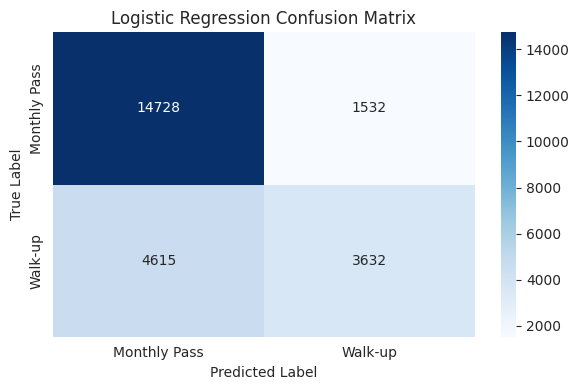

In [ ]:
# Confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=log_reg_pipe.classes_,
            yticklabels=log_reg_pipe.classes_)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

In [ ]:
# Save the pipeline for future use
joblib.dump(log_reg_pipe, 'logistic_regression_model.pkl')
print("Model saved as 'logistic_regression_model.pkl'")

Model saved as 'logistic_regression_model.pkl'


## **3.2 DATA MODEL 2**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, classification_report, confusion_matrix,
    roc_auc_score
)
import joblib

In [ ]:
# Extract 'Start Hour' from 'Start Time'
df['Start Hour'] = pd.to_datetime(df['Start Time']).dt.hour

# Keep only needed columns and drop rows with missing values
df_model = df[['Duration_minutes', 'Start Hour', 'Trip Route Category', 'Passholder Type']].dropna()

# Keep only relevant user types
df_model = df_model[df_model['Passholder Type'].isin(['Walk-up', 'Monthly Pass'])]

# Encode categorical feature
le = LabelEncoder()
df_model['Trip Route Category'] = le.fit_transform(df_model['Trip Route Category'])

# Define features and target
X = df_model[['Duration_minutes', 'Start Hour', 'Trip Route Category']]
y = df_model['Passholder Type']

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
# Preprocessing
categorical = ['Trip Route Category']
numeric = ['Trip Duration (min)', 'Start Hour']

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first'), categorical)
], remainder='passthrough')

# Decision Tree Classifier pipeline (with limited depth to avoid overfitting)
tree_pipe = Pipeline([
    ('prep', preprocessor),
    ('model', DecisionTreeClassifier(max_depth=6, class_weight='balanced', random_state=42))
])

In [ ]:
# Fit model
tree_pipe.fit(X_train, y_train)

# Predict
y_pred_tree = tree_pipe.predict(X_test)
y_proba_tree = tree_pipe.predict_proba(X_test)[:, 1]  # Prob for ROC AUC
y_binary_tree = (y_test == "Walk-up").astype(int)

In [ ]:
def evaluate_model(y_true, y_pred, y_proba=None, label="Model"):
    print(f"\n {label} Results")
    print("Accuracy:       ", accuracy_score(y_true, y_pred))
    print("Precision:      ", precision_score(y_true, y_pred, pos_label='Walk-up'))
    print("Recall:         ", recall_score(y_true, y_pred, pos_label='Walk-up'))
    print("F1 Score:       ", f1_score(y_true, y_pred, pos_label='Walk-up'))
    if y_proba is not None:
        print("ROC AUC Score:  ", roc_auc_score((y_true == "Walk-up").astype(int), y_proba))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

# Run evaluation
evaluate_model(y_test, y_pred_tree, y_proba_tree, label="Decision Tree")


 Decision Tree Results
Accuracy:        0.7386869057820215
Precision:       0.5913009016149807
Recall:          0.7236570874257305
F1 Score:        0.6508178844056707
ROC AUC Score:   0.8137422255452091

Classification Report:
               precision    recall  f1-score   support

Monthly Pass       0.84      0.75      0.79     16260
     Walk-up       0.59      0.72      0.65      8247

    accuracy                           0.74     24507
   macro avg       0.72      0.73      0.72     24507
weighted avg       0.76      0.74      0.74     24507



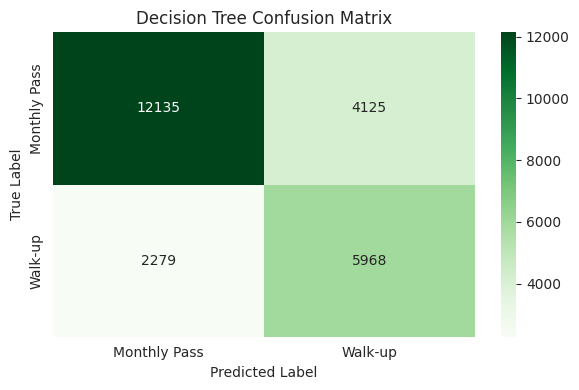

In [ ]:
# Confusion matrix
cm_tree = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Greens',
            xticklabels=tree_pipe.classes_,
            yticklabels=tree_pipe.classes_)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

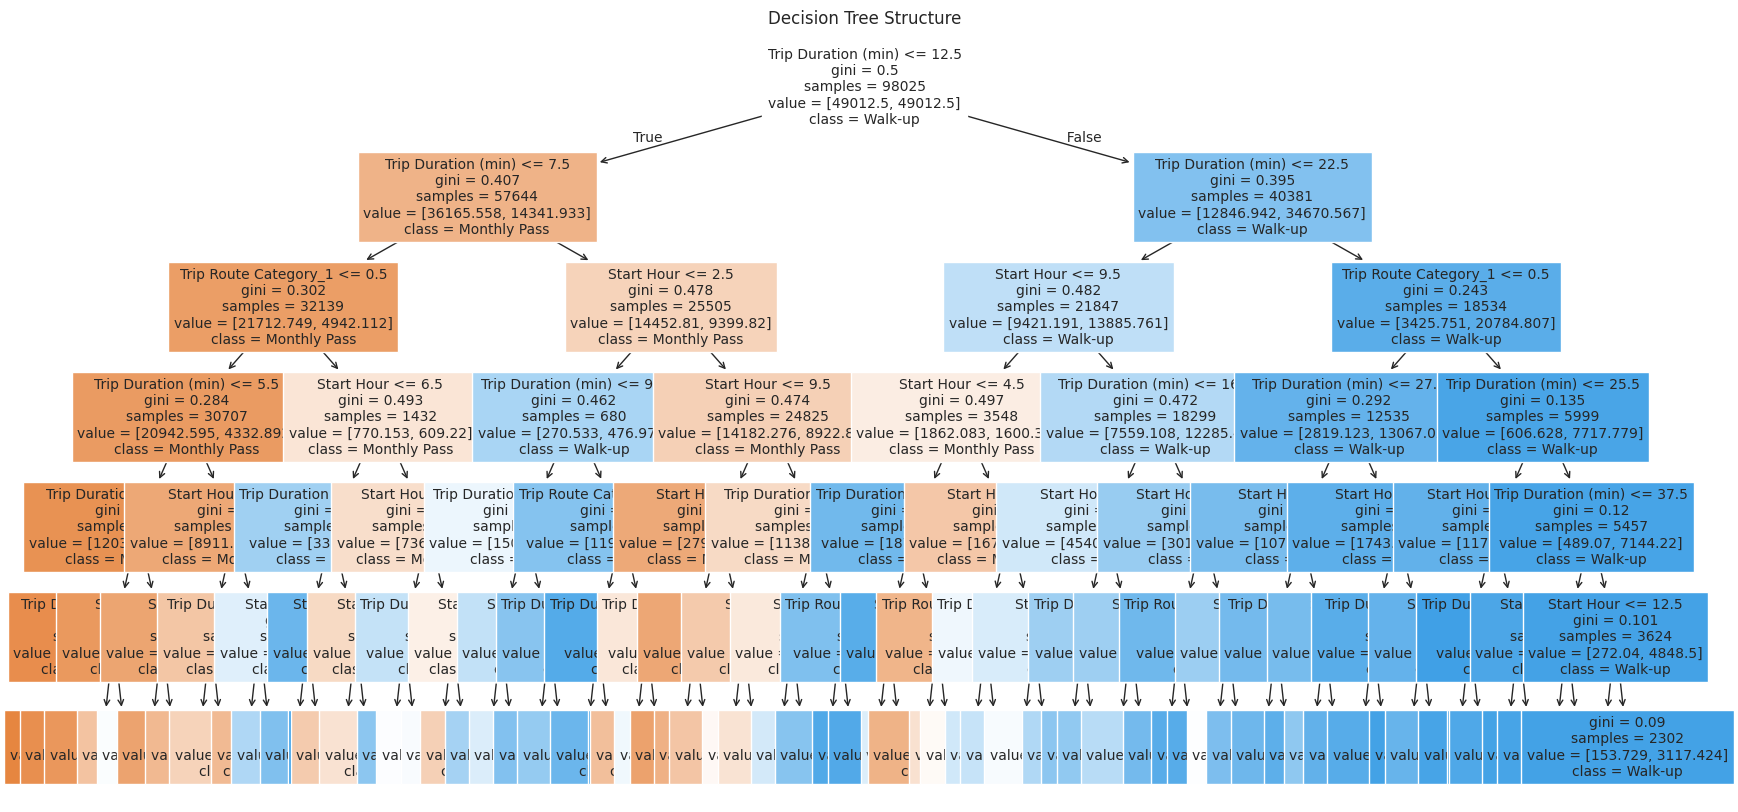

In [ ]:
# Extract trained tree and feature names
tree_model = tree_pipe.named_steps['model']
feature_names = preprocessor.transformers_[0][1].get_feature_names_out(['Trip Route Category']).tolist() + numeric

plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=feature_names, class_names=tree_pipe.classes_, filled=True, fontsize=10)
plt.title("Decision Tree Structure")
plt.show()

In [ ]:
# Save the model pipeline
joblib.dump(tree_pipe, 'decision_tree_model.pkl')
print("Decision Tree model saved as 'decision_tree_model.pkl'")

Decision Tree model saved as 'decision_tree_model.pkl'


## **3.3 DATA MODEL 3**

In [ ]:
import pandas as pd
import os
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix,
    roc_curve, auc
)

In [ ]:
# Convert Duration from seconds to minutes
df['Duration_minutes'] = df['Duration'] / 60

# Convert Start Time to datetime and extract hour
df['Start Time'] = pd.to_datetime(df['Start Time'], errors='coerce')
df['Start_Hour'] = df['Start Time'].dt.hour

# Filter to two primary user types
df_model = df[df['Passholder Type'].isin(['Monthly Pass', 'Walk-up'])].copy()

# One-hot encode Trip Route Category
df_model = pd.get_dummies(df_model, columns=['Trip Route Category'], drop_first=True)

# Drop rows with missing data in key columns
df_model.dropna(subset=['Duration_minutes', 'Start_Hour'], inplace=True)

# Optional: Preview cleaned data
df_model[['Duration_minutes', 'Start_Hour', 'Passholder Type']].head()

,Duration_minutes,Start_Hour,Passholder Type
0,251.0,17,Walk-up
1,1286.0,14,Monthly Pass
2,1440.0,10,Walk-up
3,314.0,12,Walk-up
6,246.0,17,Walk-up


In [ ]:
# Define features and binary target (Monthly Pass = 0, Walk-up = 1)
X = df_model[['Duration_minutes', 'Start_Hour'] +
             [col for col in df_model.columns if col.startswith('Trip Route Category_')]]
y = df_model['Passholder Type'].map({'Monthly Pass': 0, 'Walk-up': 1})

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.25, random_state=42
)

# Summary of data shapes
print("X_train shape:", X_train.shape)
print("y_train distribution:\n", y_train.value_counts())

X_train shape: (91899, 3)
y_train distribution:
 Passholder Type
0    60975
1    30924
Name: count, dtype: int64


In [ ]:
model_path = 'svm_model.pkl'

if os.path.exists(model_path):
    svm_pipeline = joblib.load(model_path)
    print("Loaded pre-trained SVM model.")
else:
    svm_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('svc', SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42))
    ])
    svm_pipeline.fit(X_train, y_train)
    joblib.dump(svm_pipeline, model_path)
    print("Trained and saved new SVM model.")

✅ Trained and saved new SVM model.


In [ ]:
# Predict class labels and probabilities
y_pred_svm = svm_pipeline.predict(X_test)
y_proba_svm = svm_pipeline.predict_proba(X_test)[:, 1]

# Evaluation function
def evaluate_model(y_true, y_pred, y_proba=None, label="Model"):
    print(f"\n{label} Results")
    print("Accuracy:       ", accuracy_score(y_true, y_pred))
    print("Precision:      ", precision_score(y_true, y_pred, pos_label=1))
    print("Recall:         ", recall_score(y_true, y_pred, pos_label=1))
    print("F1 Score:       ", f1_score(y_true, y_pred, pos_label=1))
    if y_proba is not None:
        print("ROC AUC Score:  ", roc_auc_score(y_true, y_proba))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

# Run evaluation
evaluate_model(y_test, y_pred_svm, y_proba_svm, label="SVM")


🔍 SVM Results
Accuracy:        0.7508895635425848
Precision:       0.622427513033934
Recall:          0.6601668606907256
F1 Score:        0.640741961301257
ROC AUC Score:   0.8087766150653358

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81     20325
           1       0.62      0.66      0.64     10308

    accuracy                           0.75     30633
   macro avg       0.72      0.73      0.73     30633
weighted avg       0.75      0.75      0.75     30633



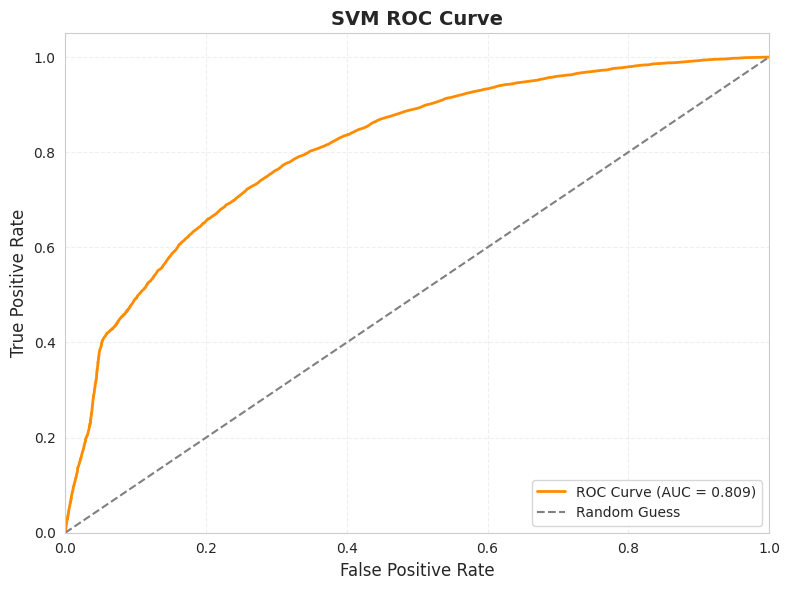

In [ ]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_svm)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('SVM ROC Curve', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

## **3.4 Model Comparison Chart**

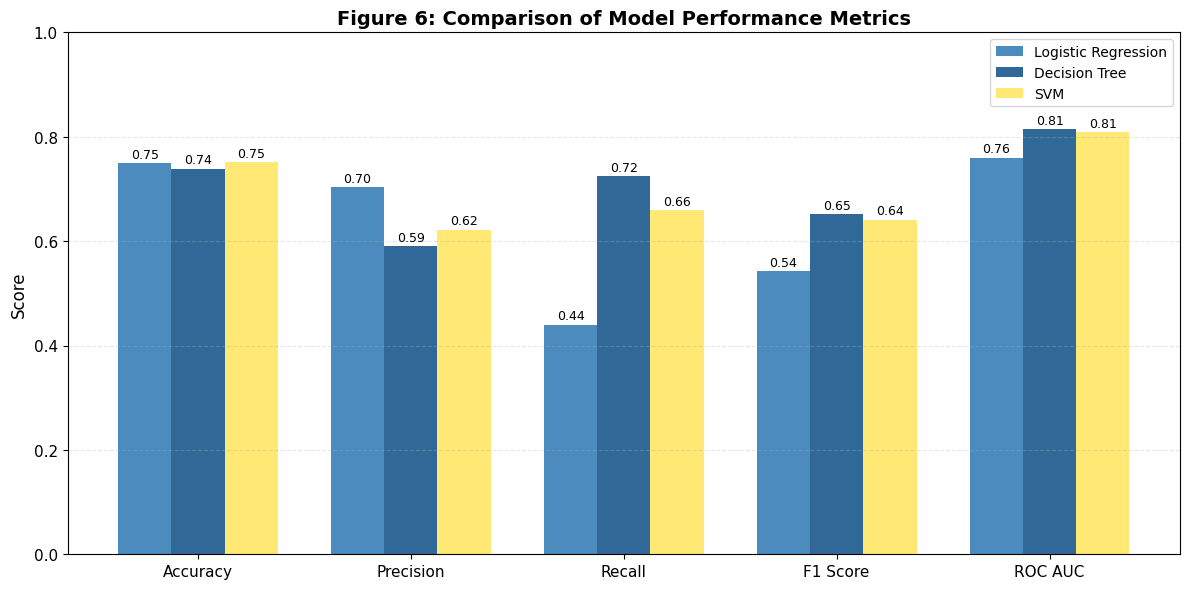

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Define metric labels
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']

# Updated scores
logistic_scores = [0.749, 0.703, 0.440, 0.542, 0.760]
tree_scores     = [0.739, 0.591, 0.724, 0.651, 0.814]
svm_scores      = [0.751, 0.622, 0.660, 0.641, 0.809]

# Create DataFrame for plotting
df_plot = pd.DataFrame({
    'Metric': metrics,
    'Logistic Regression': logistic_scores,
    'Decision Tree': tree_scores,
    'SVM': svm_scores
})

# Plot settings
plt.figure(figsize=(12, 6))
bar_width = 0.25
x = range(len(metrics))

# Plot bars
plt.bar([i - bar_width for i in x], df_plot['Logistic Regression'], width=bar_width, label='Logistic Regression', color='#4B8BBE')
plt.bar(x, df_plot['Decision Tree'], width=bar_width, label='Decision Tree', color='#306998')
plt.bar([i + bar_width for i in x], df_plot['SVM'], width=bar_width, label='SVM', color='#FFE873')

# Add value labels
for i in x:
    plt.text(i - bar_width, df_plot['Logistic Regression'][i] + 0.01, f"{df_plot['Logistic Regression'][i]:.2f}", ha='center', fontsize=9)
    plt.text(i, df_plot['Decision Tree'][i] + 0.01, f"{df_plot['Decision Tree'][i]:.2f}", ha='center', fontsize=9)
    plt.text(i + bar_width, df_plot['SVM'][i] + 0.01, f"{df_plot['SVM'][i]:.2f}", ha='center', fontsize=9)

# Styling
plt.xticks(x, metrics, fontsize=11)
plt.yticks(fontsize=11)
plt.ylabel('Score', fontsize=12)
plt.title('Figure 6: Comparison of Model Performance Metrics', fontsize=14, fontweight='bold')
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()

# Save and show
plt.savefig('figure6_model_comparison.png', dpi=300)
plt.show()


**ENDLINE**

In [ ]:
# Save the notebook to HTML
!jupyter nbconvert --to html /content/your_notebook_name.ipynb

# Convert HTML to PDF (requires wkhtmltopdf or similar)
!apt-get install -y wkhtmltopdf
!wkhtmltopdf your_notebook_name.html your_notebook_name.pdf


[NbConvertApp] WARNING | pattern '/content/your_notebook_name.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=Tru